In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

import random
import torch
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


cuda


In [ ]:
bow = pd.read_csv('/content/drive/MyDrive/BOW_models/result_bow.csv' ,encoding='utf-8')
tfidf = pd.read_csv('/content/drive/MyDrive/BOW_models/result_tfidf.csv' ,encoding='utf-8')

In [ ]:
tfidf[tfidf.model_name == "XGBoost"]

,Unnamed: 0,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,grams
5,5,XGBoost,0.928675,0.929868,0.928675,0.928549,"(1, 2)"
11,11,XGBoost,0.927157,0.928165,0.927157,0.927045,"(1, 3)"
17,17,XGBoost,0.862666,0.869176,0.862666,0.864173,"(2, 2)"
23,23,XGBoost,0.861905,0.868894,0.861905,0.863649,"(2, 3)"
29,0,XGBoost,0.724572,0.763746,0.724572,0.736627,"(3, 3)"


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})

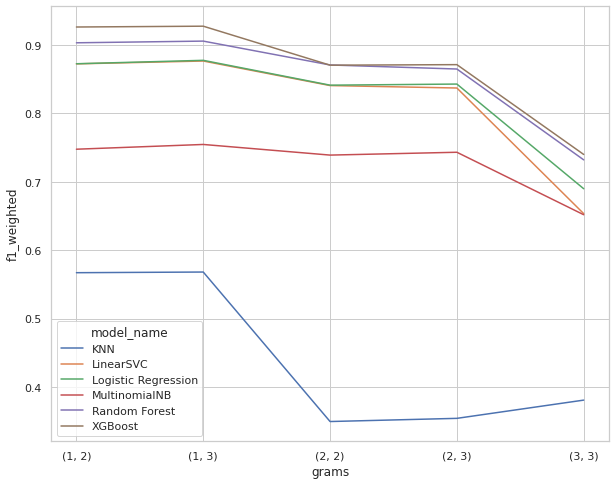

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1)
sns.lineplot(data=bow.sort_values(['model_name', 'grams']), 
             x='grams', 
             y='f1_weighted', 
             hue='model_name',
             markers=True, 
             dashes=False)

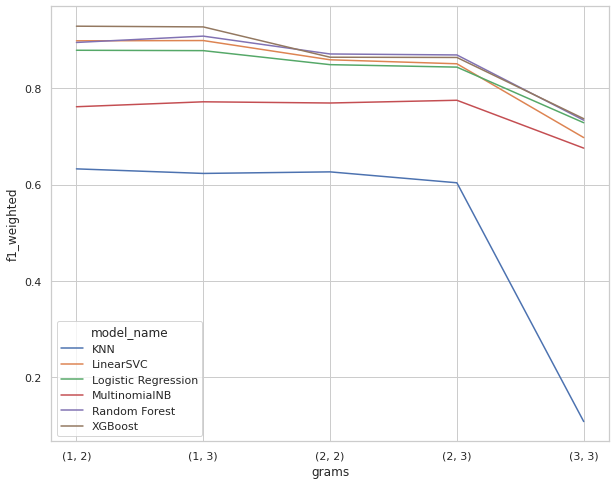

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1)
sns.lineplot(data=tfidf.sort_values(['model_name', 'grams']), 
             x='grams', 
             y='f1_weighted', 
             hue='model_name',
             markers=True, 
             dashes=False)

In [ ]:
bow_wide

model_name,KNN,LinearSVC,Logistic Regression,MultinomialNB,Random Forest,XGBoost
grams,,,,,,
"(1, 2)",0.567256,0.872447,0.872614,0.747718,0.903242,0.926308
"(1, 3)",0.568223,0.876602,0.877612,0.754665,0.905706,0.927507
"(2, 2)",0.349748,0.840729,0.841316,0.739121,0.870812,0.870525
"(2, 3)",0.354397,0.837160,0.842928,0.743271,0.864920,0.871313
"(3, 3)",0.381048,0.653549,0.689957,0.651975,0.732144,0.740043


In [ ]:
bow[bow.model_name == 'Logistic Regression']

,Unnamed: 0,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,grams
0,0,Logistic Regression,0.841801,0.846211,0.841801,0.842928,"(2, 3)"
6,6,Logistic Regression,0.872529,0.873900,0.872529,0.872614,"(1, 2)"
12,12,Logistic Regression,0.877461,0.878816,0.877461,0.877612,"(1, 3)"
18,18,Logistic Regression,0.840663,0.844058,0.840663,0.841316,"(2, 2)"
24,24,Logistic Regression,0.685879,0.697904,0.685879,0.689957,"(3, 3)"


In [ ]:
bow[bow.model_name == model]

,Unnamed: 0,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,grams
0,0,Logistic Regression,0.841801,0.846211,0.841801,0.842928,"(2, 3)"
6,6,Logistic Regression,0.872529,0.873900,0.872529,0.872614,"(1, 2)"
12,12,Logistic Regression,0.877461,0.878816,0.877461,0.877612,"(1, 3)"
18,18,Logistic Regression,0.840663,0.844058,0.840663,0.841316,"(2, 2)"
24,24,Logistic Regression,0.685879,0.697904,0.685879,0.689957,"(3, 3)"


In [ ]:
wv_model = pd.read_csv('/content/drive/MyDrive/word2vec_models/wv2.csv' ,encoding='utf-8').drop(4, axis=0)

In [ ]:
print(wv_model.to_latex(index=False))

\begin{tabular}{rlrrrrr}
\toprule
 Unnamed: 0 &          model\_name &  accuracy &  precision\_weighted &  recall\_weighted &  f1\_weighted &  grams \\
\midrule
          0 & Logistic Regression &  0.624425 &            0.640363 &         0.624425 &     0.627439 &      1 \\
          0 &           LinearSVC &  0.705998 &            0.707068 &         0.705998 &     0.703216 &      1 \\
          0 &                 KNN &  0.492776 &            0.526306 &         0.492776 &     0.477034 &      1 \\
          0 &       Random Forest &  0.582321 &            0.588119 &         0.582321 &     0.581797 &      1 \\
          0 &             XGBoost &  0.614181 &            0.623035 &         0.614181 &     0.616170 &      1 \\
\bottomrule
\end{tabular}



In [ ]:
resumeDataSet = pd.read_csv('/content/drive/MyDrive/dataset_lm.csv' ,encoding='utf-8')
resumeDataSet.head()

,Unnamed: 0,Unnamed: 0.1,position,cv,cleaned_resume
0,0,0,7,\naustin tx\nemail me on indeed httpwwwindeedc...,doctor chiropract intern licens decemb look as...
1,1,1,7,\nwaupun wi\nemail me on indeed httpwwwindeedc...,waupun will reloc anywher work experi scienc t...
2,2,2,7,\nrichardson tx\nemail me on indeed httpwwwind...,richardson teach math middl school math algebr...
3,3,3,7,\nnew port richey fl\nemail me on indeed httpw...,new port richey will reloc anywher work experi...
4,4,4,7,\nbuhl al\nemail me on indeed httpwwwindeedcom...,buhl author work u employ work experi scienc t...


In [ ]:
label_dict = {'primary_teacher' : 6,
              'kg_teacher' : 3,
              'esl_teacher' : 1,
              'ict_teacher' : 2,
              'science_teacher' : 7,
              'music_teacher' : 5,
              'math_teacher' : 4,
              'art_teacher' : 0
              }

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
train, test = train_test_split(resumeDataSet, test_size=0.2,random_state=42, stratify=resumeDataSet['position'])

train_df, valid_df = train_test_split(train, test_size=0.2, random_state=42)
X_train, y_train = train_df["cleaned_resume"], train_df["position"]
X_valid, y_valid = valid_df["cleaned_resume"], valid_df["position"]

##**BOW**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import word_tokenize
from sklearn.pipeline import make_pipeline
nltk.download('punkt')

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.model_selection import cross_validate

def return_scores(model, X_train, y_train, grams, **kwargs):

    scoring = ["accuracy",
            "precision_weighted",
            "recall_weighted", 
            "f1_weighted"]
    entries = []
    model_name = model.__class__.__name__
    scores = cross_validate(model, 
                            X_train, 
                            y_train, 
                            scoring = scoring, 
                            **kwargs)
    all_scores = []
    for key, value in scores.items():
        all_scores.append(value.mean())
    entries.append((model_name, all_scores[2], all_scores[3], all_scores[4], all_scores[5], grams))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'grams' ])
    return cv_df

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def cross_validate_models(embedding_function, X_train, y_train, grams):
    pipe_lr = make_pipeline(embedding_function, LogisticRegression(max_iter=1000, random_state=2))
    pipe_svc = make_pipeline(embedding_function, LinearSVC(random_state=2))
    pipe_knn = make_pipeline(embedding_function, KNeighborsClassifier())
    pipe_rf = make_pipeline(embedding_function, RandomForestClassifier(random_state=2))
    pipe_mnb = make_pipeline(embedding_function, MultinomialNB())
    pipe_xgb = make_pipeline(embedding_function, XGBClassifier())
    classifiers = {
        'Logistic Regression' : pipe_lr,
        "LinearSVC": pipe_svc,
        'KNN' : pipe_knn,
        'Random Forest' : pipe_rf,
        'MultinomialNB' : pipe_mnb,
        'XGBoost' : pipe_xgb
    }

    # cross validation score of the default model hyperparameter
    results_df = pd.DataFrame()
    for (name, pipe) in classifiers.items():
        results_df = results_df.append(return_scores(pipe, X_train, y_train, grams))
        results_df = results_df.replace('Pipeline',name)
    return results_df


In [ ]:
# preprocessor to remove digits in string
def remove_numeric_string(text):
    return re.sub(r'\d+', '', text)


In [ ]:
#result = pd.read_csv('/content/drive/MyDrive/BOW_models/result.csv' ,encoding='utf-8')
result = result[['model_name',	'accuracy',	'precision_weighted',	'recall_weighted',	'f1_weighted',	'grams']].drop(range(30), axis=0)
result.to_csv('/content/drive/MyDrive/BOW_models/result_tfidf.csv',encoding='utf-8')

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/BOW_models/result.csv').drop(['Unnamed: 0',	
                                                                  'Unnamed: 0.1',
                                                                  'Unnamed: 0.1.1',
                                                                  'Unnamed: 0.1.1.1',
                                                                  'Unnamed: 0.1.1.1.1'],
                                                                 axis=1)
result.to_csv('/content/drive/MyDrive/BOW_models/result_bow.csv',encoding='utf-8')

In [ ]:
result.drop(range(30), axis=0).to_csv('/content/drive/MyDrive/BOW_models/result_tfidf.csv',encoding='utf-8')

In [ ]:
result = pd.read_csv('/content/drive/MyDrive/BOW_models/result_bow.csv')

In [ ]:
for grams in [(1,1)]:
      bow_vectorizer = CountVectorizer(dtype=np.float32,
                                        preprocessor=remove_numeric_string, # remove numeric term
                                        strip_accents='unicode',
                                        tokenizer=word_tokenize,
                                        ngram_range=grams, # keep the unigram
                                        analyzer='word', # feature should be made of word n-gram
                                        min_df=10, # ignore terms appeared less than 10 times
                                        max_df=0.8, # ignore terms appeared more than 75% of the tweets available) 
      bow_vector = bow_vectorizer.fit_transform(train['cleaned_resume'])
      bow_features = pd.DataFrame(bow_vector.toarray(), 
                  columns=sorted(bow_vectorizer.vocabulary_))
      result = pd.read_csv('/content/drive/MyDrive/BOW_models/result_bow.csv' ,encoding='utf-8')
      result = result.append(cross_validate_models(bow_vectorizer, X_train, y_train, grams))
      result.to_csv('/content/drive/MyDrive/BOW_models/result_bow.csv' ,encoding='utf-8')


,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,grams
30,Logistic Regression,0.685879,0.697904,0.685879,0.689957,"(1, 2)"
31,LinearSVC,0.651739,0.658165,0.651739,0.653549,"(1, 2)"
32,KNN,0.371022,0.485607,0.371022,0.381048,"(1, 2)"
33,Random Forest,0.730266,0.740299,0.730266,0.732144,"(1, 2)"
34,MultinomialNB,0.652863,0.659659,0.652863,0.651975,"(1, 2)"
35,XGBoost,0.726849,0.770523,0.726849,0.740043,"(1, 2)"
36,Logistic Regression,0.685879,0.697904,0.685879,0.689957,"(1, 3)"
37,LinearSVC,0.651739,0.658165,0.651739,0.653549,"(1, 3)"
38,KNN,0.371022,0.485607,0.371022,0.381048,"(1, 3)"
39,Random Forest,0.730266,0.740299,0.730266,0.732144,"(1, 3)"


In [ ]:
bow_results = pd.read_csv('/content/drive/MyDrive/BOW_models/result_bow.csv' ,encoding='utf-8').drop('Unnamed: 0', axis=1)


In [ ]:
bow_results[['model_name', 'f1_weighted', 'grams']]

,model_name,f1_weighted,grams
0,Logistic Regression,0.842928,"(2, 3)"
1,LinearSVC,0.837160,"(2, 3)"
2,KNN,0.354397,"(2, 3)"
3,Random Forest,0.864920,"(2, 3)"
4,MultinomialNB,0.743271,"(2, 3)"
5,XGBoost,0.871313,"(2, 3)"
6,Logistic Regression,0.872614,"(1, 2)"
7,LinearSVC,0.872447,"(1, 2)"
8,KNN,0.567256,"(1, 2)"
9,Random Forest,0.903242,"(1, 2)"


In [ ]:
bow_results.max()

model_name             XGBoost
accuracy              0.927534
precision_weighted    0.928296
recall_weighted       0.927534
f1_weighted           0.927507
grams                   (3, 3)
dtype: object

##**TF-IDF**

In [ ]:
# unigram BOW
for grams in [(1,2),(1,3),(2,2),(2,3), (3,3)]:
      tfidf_vectorizer1 = TfidfVectorizer(dtype=np.float32,
                                        preprocessor=remove_numeric_string, # remove numeric term
                                        strip_accents='unicode',
                                        tokenizer=word_tokenize,
                                        ngram_range=grams, # keep the unigram
                                        analyzer='word', # feature should be made of word n-gram
                                        min_df=10, # ignore terms appeared less than 10 times
                                        max_df=0.8, # ignore terms appeared more than 75% of the tweets available
                                        sublinear_tf=True) 
      tfidf_vector1 = tfidf_vectorizer1.fit_transform(train['cleaned_resume'])
      tfidf_features1 = pd.DataFrame(tfidf_vector1.toarray(), 
                  columns=sorted(tfidf_vectorizer1.vocabulary_))
      result = pd.read_csv('/content/drive/MyDrive/BOW_models/result_tfidf.csv' ,encoding='utf-8')
      result = result.append(cross_validate_models(tfidf_vectorizer1, X_train, y_train, grams))
      result.to_csv('/content/drive/MyDrive/BOW_models/result_tfidf.csv' ,encoding='utf-8')

In [ ]:
pd.read_csv('/content/drive/MyDrive/BOW_models/result_tfidf.csv' ,encoding='utf-8').sort_values('model_name')

,Unnamed: 0,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,grams
14,14,KNN,0.630882,0.630002,0.630882,0.626278,"(2, 2)"
2,2,KNN,0.637321,0.642809,0.637321,0.632505,"(1, 2)"
26,0,KNN,0.161223,0.466559,0.161223,0.108273,"(3, 3)"
20,20,KNN,0.608875,0.608480,0.608875,0.603640,"(2, 3)"
8,8,KNN,0.627843,0.631366,0.627843,0.623049,"(1, 3)"
1,1,LinearSVC,0.898328,0.899797,0.898328,0.898202,"(1, 2)"
25,0,LinearSVC,0.696121,0.701141,0.696121,0.697431,"(3, 3)"
7,7,LinearSVC,0.898710,0.900754,0.898710,0.898737,"(1, 3)"
19,19,LinearSVC,0.850527,0.852321,0.850527,0.850553,"(2, 3)"
13,13,LinearSVC,0.858872,0.860448,0.858872,0.858842,"(2, 2)"


##**Word2Vec**

In [ ]:
!pip install gensim==4.3.0
!pip install numpy==1.24.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=dfef508b28acc02971adefecd484b7b527d11b96110a5a30b558be198a9b8177
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=5bf5097f7455c184adba03cc018baf58bb7607981c449ffa85046f018c6be403
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0

In [ ]:
import gensim
from gensim.models import Word2Vec
from collections import defaultdict


In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = next(iter(word2vec.items()))[1].shape[0]

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ], dtype=object)

In [ ]:
word2vec_model = Word2Vec(X_train.apply(word_tokenize), seed=1)
word2vec_dict = dict(zip(word2vec_model.wv.key_to_index.keys(), 
         word2vec_model.wv.vectors))

word2vec_results = cross_validate_models(MeanEmbeddingVectorizer(word2vec_dict), 
                                         X_train.apply(word_tokenize), y_train, grams=1)

word2vec_results

,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,grams
0,Logistic Regression,0.697261,0.703468,0.697261,0.698142,1
0,LinearSVC,0.723059,0.723010,0.723059,0.719981,1
0,KNN,0.503789,0.509363,0.503789,0.498503,1
0,Random Forest,0.592930,0.599654,0.592930,0.594634,1
0,MultinomialNB,NaN,NaN,NaN,NaN,1
0,XGBoost,0.608485,0.616932,0.608485,0.611073,1


In [ ]:
corpus = dtf_train["text_clean"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
word2vec_results.to_csv('/content/drive/MyDrive/word2vec_models/wv1.csv' ,encoding='utf-8')

In [ ]:
from gensim.models import KeyedVectors
path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
word2vec_pretrained = KeyedVectors.load_word2vec_format(path,binary=True)
word2vec_pretrained_dict = dict(zip(word2vec_pretrained.key_to_index.keys(), 
                                    word2vec_pretrained.vectors))

pretrained_word2vec_results = cross_validate_models(MeanEmbeddingVectorizer(word2vec_pretrained_dict), 
                                         X_train.apply(word_tokenize), y_train, grams=2)
pretrained_word2vec_results.to_csv('/content/drive/MyDrive/word2vec_models/wv2.csv' ,encoding='utf-8')

KeyboardInterrupt: ignored

In [ ]:
pretrained_word2vec_results

,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,grams
0,Logistic Regression,0.624425,0.640363,0.624425,0.627439,1
0,LinearSVC,0.705998,0.707068,0.705998,0.703216,1
0,KNN,0.492776,0.526306,0.492776,0.477034,1
0,Random Forest,0.582321,0.588119,0.582321,0.581797,1
0,MultinomialNB,NaN,NaN,NaN,NaN,1
0,XGBoost,0.614181,0.623035,0.614181,0.616170,1


##**BERT**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.6 MB/s eta 0:00:00


In [ ]:
import torch
import transformers

from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

tokenizer_bbu = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:

from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:
tokenizer_bbu = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(resumeDataSet.index.values, 
                                                  resumeDataSet.position.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=resumeDataSet.position.values)

resumeDataSet['data_type'] = ['not_set']*resumeDataSet.shape[0]
resumeDataSet.loc[X_train, 'data_type'] = 'train'
resumeDataSet.loc[X_val, 'data_type'] = 'val'

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        accuracy = len(y_preds[y_preds==label])/len(y_true)
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {accuracy}\n')


def evaluate(model, dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:

max_length = 512
lr_ = 1e-5
eps_ = 1e-8
epochs = 5
batch_size = 3

encoded_data_train_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='train'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

encoded_data_val_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='val'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)


input_ids_train_bbu = encoded_data_train_bbu['input_ids']
attention_masks_train_bbu = encoded_data_train_bbu['attention_mask']
labels_train_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='train'].position.values)

input_ids_val_bbu = encoded_data_val_bbu['input_ids']
attention_masks_val_bbu = encoded_data_val_bbu['attention_mask']
labels_val_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='val'].position.values)



dataset_train_bbu = TensorDataset(input_ids_train_bbu, attention_masks_train_bbu, labels_train_bbu)
dataset_val_bbu = TensorDataset(input_ids_val_bbu, attention_masks_val_bbu, labels_val_bbu)



model_bbu = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)






from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


dataloader_train_bbu = DataLoader(dataset_train_bbu, 
                              sampler=RandomSampler(dataset_train_bbu), 
                              batch_size=batch_size)

dataloader_validation_bbu = DataLoader(dataset_val_bbu, 
                                   sampler=SequentialSampler(dataset_val_bbu), 
                                   batch_size=batch_size)



from transformers import AdamW, get_linear_schedule_with_warmup

optimizer_bbu = AdamW(model_bbu.parameters(),
                  lr=lr_, 
                  eps=eps_)






scheduler_bbu = get_linear_schedule_with_warmup(optimizer_bbu, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train_bbu)*epochs)

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bbu.to(device)

results = pd.DataFrame()
for epoch in tqdm(range(1, epochs+1)):
    
    model_bbu.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train_bbu, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model_bbu.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model_bbu(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model_bbu.parameters(), 1.0)

        optimizer_bbu.step()
        scheduler_bbu.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    #torch.save(model_bbu.state_dict(), f'/content/drive/MyDrive/BERT_models/finetuned_BERT_512_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train_bbu)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(model_bbu, dataloader_validation_bbu)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    results = results.append({'epoch' : epoch,
                    'max_length' : max_length,
                    'batch_size' : batch_size,
                    'lr_rate' : lr_,
                    'eps': eps_,
                    'train_loss' : loss_train_avg,
                    "val_loss" : val_loss,
                    "val_f1" : val_f1
          }, ignore_index=True)


res = pd.read_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')
    
res = res.append(results, ignore_index=True)

res.to_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.7667216833149368
Validation loss: 0.332850678091489
F1 Score (Weighted): 0.9239025761671773


Epoch 2:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.2873632064058853
Validation loss: 0.41223772544045345
F1 Score (Weighted): 0.9209751958326959


Epoch 3:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.20773779231831097
Validation loss: 0.45456304172906137
F1 Score (Weighted): 0.9159898807426133


Epoch 4:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.13829498416776095
Validation loss: 0.47746898321767145
F1 Score (Weighted): 0.9193166272688224


Epoch 5:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.11577075829235844
Validation loss: 0.4734617442904759
F1 Score (Weighted): 0.9180049789599704


In [ ]:
max_length = 512
lr_ = 2e-5
eps_ = 1e-8
epochs = 5
batch_size = 3

encoded_data_train_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='train'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

encoded_data_val_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='val'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)


input_ids_train_bbu = encoded_data_train_bbu['input_ids']
attention_masks_train_bbu = encoded_data_train_bbu['attention_mask']
labels_train_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='train'].position.values)

input_ids_val_bbu = encoded_data_val_bbu['input_ids']
attention_masks_val_bbu = encoded_data_val_bbu['attention_mask']
labels_val_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='val'].position.values)



dataset_train_bbu = TensorDataset(input_ids_train_bbu, attention_masks_train_bbu, labels_train_bbu)
dataset_val_bbu = TensorDataset(input_ids_val_bbu, attention_masks_val_bbu, labels_val_bbu)



model_bbu = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)






from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


dataloader_train_bbu = DataLoader(dataset_train_bbu, 
                              sampler=RandomSampler(dataset_train_bbu), 
                              batch_size=batch_size)

dataloader_validation_bbu = DataLoader(dataset_val_bbu, 
                                   sampler=SequentialSampler(dataset_val_bbu), 
                                   batch_size=batch_size)



from transformers import AdamW, get_linear_schedule_with_warmup

optimizer_bbu = AdamW(model_bbu.parameters(),
                  lr=lr_, 
                  eps=eps_)






scheduler_bbu = get_linear_schedule_with_warmup(optimizer_bbu, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train_bbu)*epochs)

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bbu.to(device)

results = pd.DataFrame()
for epoch in tqdm(range(1, epochs+1)):
    
    model_bbu.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train_bbu, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model_bbu.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model_bbu(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model_bbu.parameters(), 1.0)

        optimizer_bbu.step()
        scheduler_bbu.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    #torch.save(model_bbu.state_dict(), f'/content/drive/MyDrive/BERT_models/finetuned_BERT_512_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train_bbu)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(model_bbu, dataloader_validation_bbu)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    results = results.append({'epoch' : epoch,
                    'max_length' : max_length,
                    'batch_size' : batch_size,
                    'lr_rate' : lr_,
                    'eps': eps_,
                    'train_loss' : loss_train_avg,
                    "val_loss" : val_loss,
                    "val_f1" : val_f1
          }, ignore_index=True)


res = pd.read_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')
    
res = res.append(results, ignore_index=True)

res.to_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6664749078429444
Validation loss: 0.4476695316809781
F1 Score (Weighted): 0.9131896108349575


Epoch 2:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.31475276662768586
Validation loss: 0.44566871076980513
F1 Score (Weighted): 0.9211318981363396


Epoch 3:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.212650450998999
Validation loss: 0.47218811345395173
F1 Score (Weighted): 0.9144227085346432


Epoch 4:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.13542443454196165
Validation loss: 0.501198283797616
F1 Score (Weighted): 0.9209794645468345


Epoch 5:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.10713228109599336
Validation loss: 0.46565666287056356
F1 Score (Weighted): 0.9256816597947017


In [ ]:
# results,csv 512, lr=1e-5, eps=1e-5, batch 3
max_length = 450
lr_ = 1e-5
eps_ = 1e-8
epochs = 5
batch_size = 3

encoded_data_train_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='train'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

encoded_data_val_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='val'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)


input_ids_train_bbu = encoded_data_train_bbu['input_ids']
attention_masks_train_bbu = encoded_data_train_bbu['attention_mask']
labels_train_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='train'].position.values)

input_ids_val_bbu = encoded_data_val_bbu['input_ids']
attention_masks_val_bbu = encoded_data_val_bbu['attention_mask']
labels_val_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='val'].position.values)



dataset_train_bbu = TensorDataset(input_ids_train_bbu, attention_masks_train_bbu, labels_train_bbu)
dataset_val_bbu = TensorDataset(input_ids_val_bbu, attention_masks_val_bbu, labels_val_bbu)



model_bbu = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)






from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


dataloader_train_bbu = DataLoader(dataset_train_bbu, 
                              sampler=RandomSampler(dataset_train_bbu), 
                              batch_size=batch_size)

dataloader_validation_bbu = DataLoader(dataset_val_bbu, 
                                   sampler=SequentialSampler(dataset_val_bbu), 
                                   batch_size=batch_size)



from transformers import AdamW, get_linear_schedule_with_warmup

optimizer_bbu = AdamW(model_bbu.parameters(),
                  lr=lr_, 
                  eps=eps_)






scheduler_bbu = get_linear_schedule_with_warmup(optimizer_bbu, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train_bbu)*epochs)

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bbu.to(device)

results = pd.DataFrame()
for epoch in tqdm(range(1, epochs+1)):
    
    model_bbu.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train_bbu, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model_bbu.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model_bbu(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model_bbu.parameters(), 1.0)

        optimizer_bbu.step()
        scheduler_bbu.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    #torch.save(model_bbu.state_dict(), f'/content/drive/MyDrive/BERT_models/finetuned_BERT_512_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train_bbu)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(model_bbu, dataloader_validation_bbu)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    results = results.append({'epoch' : epoch,
                    'max_length' : max_length,
                    'batch_size' : batch_size,
                    'lr_rate' : lr_,
                    'eps': eps_,
                    'train_loss' : loss_train_avg,
                    "val_loss" : val_loss,
                    "val_f1" : val_f1
          }, ignore_index=True)


res = pd.read_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')
    
res = res.append(results, ignore_index=True)

res.to_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.7719111213230727
Validation loss: 0.39989091542061167
F1 Score (Weighted): 0.9124503751136758


Epoch 2:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.31345153208694326
Validation loss: 0.43771755142087676
F1 Score (Weighted): 0.9211473789309148


Epoch 3:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.22751634863094325
Validation loss: 0.4602799307972021
F1 Score (Weighted): 0.912794313929516


Epoch 4:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.16630258648089694
Validation loss: 0.5007921310347387
F1 Score (Weighted): 0.9195107440656366


Epoch 5:   0%|          | 0/1167 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.1327720944500439
Validation loss: 0.48877982288521027
F1 Score (Weighted): 0.92742182596462


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(resumeDataSet.index.values, 
                                                  resumeDataSet.position.values, 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  stratify=resumeDataSet.position.values)

resumeDataSet['data_type'] = ['not_set']*resumeDataSet.shape[0]
resumeDataSet.loc[X_train, 'data_type'] = 'train'
resumeDataSet.loc[X_val, 'data_type'] = 'val'

In [ ]:
max_length = 512
lr_ = 2e-5
eps_ = 1e-8
epochs = 5
batch_size = 3

encoded_data_train_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='train'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

encoded_data_val_bbu = tokenizer_bbu.batch_encode_plus(
    resumeDataSet[resumeDataSet.data_type=='val'].cv.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)


input_ids_train_bbu = encoded_data_train_bbu['input_ids']
attention_masks_train_bbu = encoded_data_train_bbu['attention_mask']
labels_train_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='train'].position.values)

input_ids_val_bbu = encoded_data_val_bbu['input_ids']
attention_masks_val_bbu = encoded_data_val_bbu['attention_mask']
labels_val_bbu = torch.tensor(resumeDataSet[resumeDataSet.data_type=='val'].position.values)



dataset_train_bbu = TensorDataset(input_ids_train_bbu, attention_masks_train_bbu, labels_train_bbu)
dataset_val_bbu = TensorDataset(input_ids_val_bbu, attention_masks_val_bbu, labels_val_bbu)



model_bbu = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)






from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


dataloader_train_bbu = DataLoader(dataset_train_bbu, 
                              sampler=RandomSampler(dataset_train_bbu), 
                              batch_size=batch_size)

dataloader_validation_bbu = DataLoader(dataset_val_bbu, 
                                   sampler=SequentialSampler(dataset_val_bbu), 
                                   batch_size=batch_size)



from transformers import AdamW, get_linear_schedule_with_warmup

optimizer_bbu = AdamW(model_bbu.parameters(),
                  lr=lr_, 
                  eps=eps_)






scheduler_bbu = get_linear_schedule_with_warmup(optimizer_bbu, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train_bbu)*epochs)

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bbu.to(device)

results = pd.DataFrame()
for epoch in tqdm(range(1, epochs+1)):
    
    model_bbu.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train_bbu, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model_bbu.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model_bbu(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model_bbu.parameters(), 1.0)

        optimizer_bbu.step()
        scheduler_bbu.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    #torch.save(model_bbu.state_dict(), f'/content/drive/MyDrive/BERT_models/finetuned_BERT_512_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train_bbu)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(model_bbu, dataloader_validation_bbu)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    results = results.append({'epoch' : epoch,
                    'max_length' : max_length,
                    'batch_size' : batch_size,
                    'lr_rate' : lr_,
                    'eps': eps_,
                    'train_loss' : loss_train_avg,
                    "val_loss" : val_loss,
                    "val_f1" : val_f1
          }, ignore_index=True)


res = pd.read_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')
    
res = res.append(results, ignore_index=True)

res.to_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1099 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.2555363734834935


In [ ]:
import pandas as pd
res = pd.read_csv('/content/drive/MyDrive/BERT_models/results1.csv', encoding='utf-8')


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,epoch,max_length,batch_size,lr_rate,eps,train_loss,val_loss,val_f1
0,0,0.0,0.0,NaN,1.0,512.0,3.0,0.00001,1.000000e-08,0.766722,0.332851,0.923903
1,1,1.0,1.0,NaN,2.0,512.0,3.0,0.00001,1.000000e-08,0.287363,0.412238,0.920975
2,2,2.0,2.0,NaN,3.0,512.0,3.0,0.00001,1.000000e-08,0.207738,0.454563,0.915990
3,3,3.0,3.0,NaN,4.0,512.0,3.0,0.00001,1.000000e-08,0.138295,0.477469,0.919317
4,4,4.0,4.0,NaN,5.0,512.0,3.0,0.00001,1.000000e-08,0.115771,0.473462,0.918005
5,5,5.0,NaN,NaN,1.0,512.0,3.0,0.00002,1.000000e-08,0.666475,0.447670,0.913190
6,6,6.0,NaN,NaN,2.0,512.0,3.0,0.00002,1.000000e-08,0.314753,0.445669,0.921132
7,7,7.0,NaN,NaN,3.0,512.0,3.0,0.00002,1.000000e-08,0.212650,0.472188,0.914423
8,8,8.0,NaN,NaN,4.0,512.0,3.0,0.00002,1.000000e-08,0.135424,0.501198,0.920979
9,9,9.0,NaN,NaN,5.0,512.0,3.0,0.00002,1.000000e-08,0.107132,0.465657,0.925682


##**LDA Topic Modelling**

In [ ]:
!pip install pyLDAvis
import gensim
from gensim import corpora
import pyLDAvis.gensim_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6a3acc395748a637d8218542b002aaace16833eb96a9c1cdeb0e0ced120b2507
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=389964298c25b4c6dbf55b762b181dc396a2205b54dd44e60fc217ff9474901e
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [ ]:
docs = resumeDataSet["cleaned_resume"].values
dictionary = corpora.Dictionary(d.split() for d in docs)
bow = [dictionary.doc2bow(d.split()) for d in docs]
lda = gensim.models.ldamodel.LdaModel
num_topics = 8
ldamodel = lda(
    bow, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=50, 
    minimum_probability=0
)
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.016*"manag" + 0.011*"servic" + 0.011*"custom" + 0.009*"work" + 0.009*"skill" + 0.007*"sale" + 0.006*"busi" + 0.006*"offic" + 0.006*"commun" + 0.006*"oper"'),
 (1,
  '0.036*"profici" + 0.029*"result" + 0.027*"full" + 0.022*"highli" + 0.018*"manag" + 0.017*"skill" + 0.015*"expert" + 0.013*"develop" + 0.009*"custom" + 0.009*"certif"'),
 (2,
  '0.016*"health" + 0.013*"program" + 0.011*"group" + 0.011*"servic" + 0.010*"plan" + 0.009*"work" + 0.009*"counsel" + 0.009*"manag" + 0.008*"individu" + 0.008*"therapi"'),
 (3,
  '0.033*"english" + 0.027*"school" + 0.024*"teacher" + 0.017*"educ" + 0.016*"languag" + 0.015*"esl" + 0.011*"student" + 0.011*"teach" + 0.010*"work" + 0.010*"univers"'),
 (4,
  '0.109*"music" + 0.017*"perform" + 0.013*"piano" + 0.010*"director" + 0.010*"band" + 0.008*"teach" + 0.008*"present" + 0.007*"choir" + 0.007*"instrument" + 0.006*"school"'),
 (5,
  '0.041*"student" + 0.020*"teacher" + 0.018*"school" + 0.016*"educ" + 0.015*"learn" + 0.013*"develop" + 0.012*"pla

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel, bow, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.091745 -0.020479       1        1  33.501032
6      0.016390 -0.115462       2        1  21.669561
0     -0.080872  0.087623       3        1  13.725219
7     -0.113403  0.059904       4        1  10.735911
1     -0.059777 -0.035104       5        1   7.200721
3      0.061195 -0.210662       6        1   6.100294
2     -0.077461  0.132967       7        1   3.575291
4      0.345672  0.101212       8        1   3.491970, topic_info=            Term         Freq        Total Category  logprob  loglift
2046       music  5378.000000  5378.000000  Default  30.0000  30.0000
497      profici  4363.000000  4363.000000  Default  29.0000  29.0000
241        child  7372.000000  7372.000000  Default  28.0000  28.0000
265      english  5242.000000  5242.000000  Default  27.0000  27.0000
1156      result  3333.000000  3333.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1654        play   174.529627   642.280396   Topic8  -5.6416   2.0518
183          new   220.022894  4964.057459   Topic8  -5.4099   0.2385
458   instructor   191.965941  1451.055204   Topic8  -5.5463   1.3320
242        class   199.235149  4701.750093   Topic8  -5.5092   0.1935
286       includ   194.369246  3981.245151   Topic8  -5.5339   0.3351

[663 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
27039      6  0.965886         ababa
40400      6  0.987268  abomeycalavi
1339       7  0.994222          abus
217        1  0.856564        academ
217        2  0.052830        academ
...      ...       ...           ...
1612       3  0.106556         youth
1612       4  0.034988         youth
1612       6  0.146315         youth
1612       7  0.540730         youth
1612       8  0.124050         youth

[1637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 1, 8, 2, 4, 3, 5])

#CNN

In [ ]:
!pip install --upgrade keras==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from subprocess import check_output
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import codecs
import keras
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers import Dense, Input, Flatten, Dropout
from keras.callbacks import EarlyStopping
#print(check_output(["ls", "../input"]).decode("utf8"))
stopwords0 = set(stopwords.words('english'))

In [ ]:
from keras.layers import Concatenate
#merged = Concatenate()([x1, x2])

In [ ]:
EMBEDDINGDIM = 300
MAXVOCABSIZE = 175303 
MAXSEQLENGTH = 200 
batchsize = 256 
epochs = 20

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
train['cleaned_resume'] = train['cleaned_resume'].astype('str') 
train.dtypes
train["tokens"] = train["cleaned_resume"].apply(tokenizer.tokenize)
# delete Stop Words
train["tokens"] = train["tokens"].apply(lambda vec: [word for word in vec if word not in stopwords0])
train.head()

,position,cv,cleaned_resume,tokens
1175,4,\nsteam educator online teaching in higher edu...,steam educator online teaching higher educati...,"[steam, educator, online, teaching, higher, ed..."
2095,3,\nexperienced and willing to take up new roles...,experienced willing take new roles foxborough...,"[experienced, willing, take, new, roles, foxbo..."
2302,3,\nbrooklyn ny\nemail me on indeed httpwwwindee...,strength planning engaging multimedia lessons...,"[strength, planning, engaging, multimedia, les..."
404,7,\nsalt lake city ut\nemail me on indeed httpww...,salt lake city work experience science teache...,"[salt, lake, city, work, experience, science, ..."
298,7,\napex nc\nemail me on indeed httpwwwindeedcom...,apex willing relocate anywhere authorized wor...,"[apex, willing, relocate, anywhere, authorized..."


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
test['cleaned_resume'] = test['cleaned_resume'].astype('str') 
test.dtypes
test["tokens"] = test["cleaned_resume"].apply(tokenizer.tokenize)
# delete Stop Words
test["tokens"] = test["tokens"].apply(lambda vec: [word for word in vec if word not in stopwords0])
test.head()

,position,cv,cleaned_resume,tokens
71,7,\nirving tx\nemail me on indeed httpwwwindeedc...,irving im hard efficient worker always surpas...,"[irving, im, hard, efficient, worker, always, ..."
2800,2,job seeker\nemail me on indeed httpwwwindeedco...,job seeker work experience ict teacher technic...,"[job, seeker, work, experience, ict, teacher, ..."
562,5,\npiano teacher\narlington tx\nemail me on ind...,piano teacher arlington experience teaching p...,"[piano, teacher, arlington, experience, teachi..."
2900,2,\nspecial education teacher third grade ict p...,special education teacher third grade ict ps ...,"[special, education, teacher, third, grade, ic..."
1262,4,\nsecondary mathematics teacherspanish teacher...,secondary mathematics teacherspanish teacher ...,"[secondary, mathematics, teacherspanish, teach..."


In [ ]:
alltrainingwords = [word for tokens in train["tokens"] for word in tokens]
trainingsentencelengths = [len(tokens) for tokens in train["tokens"]]
TRAININGVOCAB = sorted(list(set(alltrainingwords)))
print("%s words total, with a vocabulary size of %s" % (len(alltrainingwords), len(TRAININGVOCAB)))
print("Max sentence length is %s" % max(trainingsentencelengths))

1125447 words total, with a vocabulary size of 44668
Max sentence length is 3024


In [ ]:
alltestwords = [word for tokens in test["tokens"] for word in tokens]
testsentencelengths = [len(tokens) for tokens in test["tokens"]]
TESTVOCAB = sorted(list(set(alltestwords)))
print("%s words total, with a vocabulary size of %s" % (len(alltestwords), len(TESTVOCAB)))
print("Max sentence length is %s" % max(testsentencelengths))

283446 words total, with a vocabulary size of 20749
Max sentence length is 2233


In [ ]:
word2vecpath = "/content/drive/MyDrive/Thesis_Niiaz/GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vecpath, binary=True)
def getaverageword2vec(tokenslist, vector, generatemissing=False, k=300):
    if len(tokenslist)<1:
        return np.zeros(k)
    if generatemissing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokenslist]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokenslist]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged


In [ ]:
#GETTING EMBEDDINGS
def getword2vecembeddings(vectors, df, generatemissing=False):
    embeddings = df['tokens'].apply(lambda x: getaverageword2vec(x, vectors, 
                                                                          generatemissing=generatemissing))
    return list(embeddings)

In [ ]:
trainingembeddings = getword2vecembeddings(word2vec, train, generatemissing=True)
tokenizer = Tokenizer(num_words=MAXVOCABSIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(train["cleaned_resume"].tolist())
trainingsequences = tokenizer.texts_to_sequences(train["cleaned_resume"].tolist())

trainwordindex = tokenizer.word_index
print('Found %s unique tokens.' % len(trainwordindex))

traincnndata = pad_sequences(trainingsequences, maxlen=MAXSEQLENGTH)

trainembeddingweights = np.zeros((len(trainwordindex)+1, EMBEDDINGDIM))
for word,index in trainwordindex.items():
    trainembeddingweights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDINGDIM)
print(trainembeddingweights.shape)


Found 44684 unique tokens.
(44685, 300)


In [ ]:
testsequences = tokenizer.texts_to_sequences(test["cleaned_resume"].tolist())
testcnndata = pad_sequences(testsequences, maxlen=MAXSEQLENGTH)

In [ ]:
#DEFINING THE CNN
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    # Finally, we feed the output into a Sigmoid layer.
    # The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) 
    # for each of the 6 labels, and the sigmoid function will squash the output between the bounds of 0 and 1.
    preds = Dense(labels_index, activation='softmax')(x)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc', 'precision', 'recall'])
    model.summary()
    return model

In [ ]:
model = ConvNet(trainembeddingweights, MAXSEQLENGTH, len(trainwordindex)+1, EMBEDDINGDIM, 
                len(label_dict.keys()), False)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 200, 300)     13405500    ['input_7[0][0]']                
                                                                                                  
 conv1d_18 (Conv1D)             (None, 198, 128)     115328      ['embedding_6[0][0]']            
                                                                                                  
 conv1d_19 (Conv1D)             (None, 197, 128)     153728      ['embedding_6[0][0]']            
                                                                                            

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbackslist = [earlystopping]

In [ ]:
x_train = traincnndata
ytrain = train['position']
y_tr = ytrain

In [ ]:
hist = model.fit(x_train, ytrain, epochs=epochs, callbacks=callbackslist, validation_split=0.1, shuffle=True, batch_size=batchsize)

Epoch 1/40
12/12 [==============================] - 28s 2s/step - loss: 2.0719 - acc: 0.1511 - mse: 16.6863 - val_loss: 2.0701 - val_acc: 0.1879 - val_mse: 16.4536
Epoch 2/40
12/12 [==============================] - 30s 2s/step - loss: 2.0569 - acc: 0.1484 - mse: 16.6866 - val_loss: 2.0551 - val_acc: 0.1606 - val_mse: 16.4537
Epoch 3/40
12/12 [==============================] - 27s 2s/step - loss: 2.0284 - acc: 0.1815 - mse: 16.6868 - val_loss: 2.0203 - val_acc: 0.1970 - val_mse: 16.4539
Epoch 4/40
12/12 [==============================] - 28s 2s/step - loss: 1.9648 - acc: 0.2078 - mse: 16.6880 - val_loss: 1.9434 - val_acc: 0.2364 - val_mse: 16.4552
Epoch 5/40
12/12 [==============================] - 28s 2s/step - loss: 1.8759 - acc: 0.2368 - mse: 16.6905 - val_loss: 1.8764 - val_acc: 0.2667 - val_mse: 16.4576
Epoch 6/40
12/12 [==============================] - 28s 2s/step - loss: 1.7847 - acc: 0.2971 - mse: 16.6931 - val_loss: 1.7817 - val_acc: 0.3545 - val_mse: 16.4599
Epoch 7/40
12/12

In [ ]:
ytest = model.predict(testcnndata, batch_size=1024. , verbose=1)

In [ ]:
list(label_dict.keys())

In [ ]:
#CREATING THE SUBMISSION.CSV FILE
submissiondf = pd.DataFrame(columns=['position'] + list(label_dict.keys()))
submissiondf['position'] = test['position'].values 
submissiondf[list(label_dict.keys())] = ytest 
submissiondf.to_csv("./cnn_submission.csv", index=False)

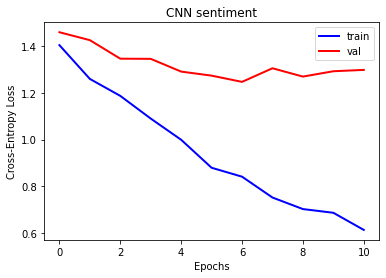

In [ ]:
#GENERATING THE GRAPHS
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

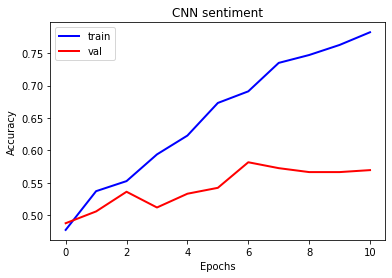

In [ ]:
plt.figure()
plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

##**Dense Model**

In [ ]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split


In [ ]:
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [ ]:
# Defining pre-processing parameters
max_len = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 100000

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
total_words = len(word_index)
total_words

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_valid)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [ ]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (2636, 300)
Shape of testing tensor:  (659, 300)


In [ ]:
# Define parameter
#vocab_size = 500 
embedding_dim = 300
drop_value = 0.2
n_dense = 24
# Define Dense Model Architecture
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='softmax'))
model.add(Dropout(drop_value))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded,
                    y_train,
                    epochs=num_epochs, 
                    validation_data=(testing_padded, y_valid),
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/100
83/83 - 1s - loss: 2.0805 - accuracy: 0.1267 - val_loss: 2.0793 - val_accuracy: 0.1335 - 1s/epoch - 15ms/step
Epoch 2/100
83/83 - 1s - loss: 2.0800 - accuracy: 0.1309 - val_loss: 2.0793 - val_accuracy: 0.1335 - 541ms/epoch - 7ms/step
Epoch 3/100
83/83 - 1s - loss: 2.0790 - accuracy: 0.1316 - val_loss: 2.0793 - val_accuracy: 0.1351 - 523ms/epoch - 6ms/step
Epoch 4/100
83/83 - 1s - loss: 2.0779 - accuracy: 0.1332 - val_loss: 2.0796 - val_accuracy: 0.1138 - 535ms/epoch - 6ms/step
Epoch 5/100
83/83 - 0s - loss: 2.0780 - accuracy: 0.1278 - val_loss: 2.0787 - val_accuracy: 0.1153 - 489ms/epoch - 6ms/step
Epoch 6/100
83/83 - 1s - loss: 2.0766 - accuracy: 0.1464 - val_loss: 2.0781 - val_accuracy: 0.1168 - 523ms/epoch - 6ms/step
Epoch 7/100
83/83 - 0s - loss: 2.0757 - accuracy: 0.1392 - val_loss: 2.0762 - val_accuracy: 0.1138 - 495ms/epoch - 6ms/step
Epoch 8/100
83/83 - 1s - loss: 2.0729 - accuracy: 0.1544 - val_loss: 2.0742 - val_accuracy: 0.1184 - 517ms/epoch - 6ms/step
Epoch 9/10

In [ ]:
model.evaluate(testing_padded, y_valid)

21/21 [==============================] - 0s 3ms/step - loss: 1.0886 - accuracy: 0.6540


[1.0886133909225464, 0.6540212631225586]

In [ ]:
train_dense_results = model.evaluate(training_padded, y_train, verbose=2, batch_size=256)
valid_dense_results = model.evaluate(testing_padded, y_valid, verbose=2, batch_size=256)
print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')

11/11 - 0s - loss: 0.8361 - accuracy: 0.7932 - 94ms/epoch - 9ms/step
3/3 - 0s - loss: 1.0886 - accuracy: 0.6540 - 38ms/epoch - 13ms/step
Train accuracy: 79.32
Valid accuracy: 65.40


##**LSTM**

In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(15,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=15)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
# Define parameter
n_lstm = 256
drop_lstm = 0.2
# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, 
                     embedding_dim, 
                     input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(8, activation='softmax'))


In [ ]:
model1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded,
                     y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, y_valid),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/30
83/83 - 27s - loss: 2.0737 - accuracy: 0.1430 - val_loss: 2.0731 - val_accuracy: 0.1593 - 27s/epoch - 326ms/step
Epoch 2/30
83/83 - 24s - loss: 2.0876 - accuracy: 0.1829 - val_loss: 2.0673 - val_accuracy: 0.1654 - 24s/epoch - 288ms/step
Epoch 3/30
83/83 - 24s - loss: 2.0574 - accuracy: 0.1798 - val_loss: 2.0641 - val_accuracy: 0.1700 - 24s/epoch - 289ms/step
Epoch 4/30
83/83 - 24s - loss: 2.0185 - accuracy: 0.2121 - val_loss: 2.0693 - val_accuracy: 0.1821 - 24s/epoch - 288ms/step
Epoch 5/30
83/83 - 24s - loss: 1.9944 - accuracy: 0.2348 - val_loss: 1.9396 - val_accuracy: 0.2519 - 24s/epoch - 287ms/step
Epoch 6/30
83/83 - 24s - loss: 1.9439 - accuracy: 0.2948 - val_loss: 2.0317 - val_accuracy: 0.2337 - 24s/epoch - 287ms/step
Epoch 7/30
83/83 - 24s - loss: 1.9714 - accuracy: 0.2508 - val_loss: 1.9220 - val_accuracy: 0.2489 - 24s/epoch - 286ms/step
Epoch 8/30
83/83 - 26s - loss: 1.9199 - accuracy: 0.2648 - val_loss: 2.0332 - val_accuracy: 0.2489 - 26s/epoch - 317ms/step
Epoch 9/

##***BiLSTM***

In [ ]:
# Defining pre-processing parameters
max_len = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 15000
embedding_dim = 512

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(128,return_sequences = True)))
#model2.add(Dropout(drop_lstm))
model2.add(Bidirectional(LSTM(128,input_shape=(training_padded.shape))))

model2.add(Dropout(0.2))

#model2.add(LSTM(128,activation='relu'))
#model2.add(Dropout(0.2))

model2.add(Dense(32,activation='relu'))

model2.add(Dropout(0.2))

model2.add(Dense(8, activation='softmax'))

In [ ]:
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history = model2.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_valid),
                     callbacks = [early_stop],
                     verbose = 2)

Epoch 1/30
83/83 - 247s - loss: 1.7430 - accuracy: 0.3145 - val_loss: 1.4052 - val_accuracy: 0.5220 - 247s/epoch - 3s/step
Epoch 2/30
83/83 - 236s - loss: 1.0354 - accuracy: 0.6722 - val_loss: 1.1942 - val_accuracy: 0.6131 - 236s/epoch - 3s/step
Epoch 3/30
83/83 - 237s - loss: 0.6427 - accuracy: 0.8134 - val_loss: 1.1799 - val_accuracy: 0.6586 - 237s/epoch - 3s/step
Epoch 4/30
83/83 - 239s - loss: 0.4361 - accuracy: 0.8851 - val_loss: 1.2551 - val_accuracy: 0.6571 - 239s/epoch - 3s/step
Epoch 5/30
83/83 - 235s - loss: 0.2677 - accuracy: 0.9336 - val_loss: 1.2427 - val_accuracy: 0.6707 - 235s/epoch - 3s/step


In [ ]:
history

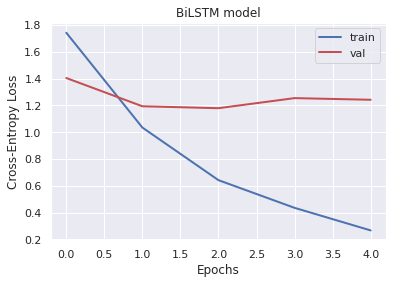

In [ ]:
#GENERATING THE GRAPHS
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('BiLSTM model')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

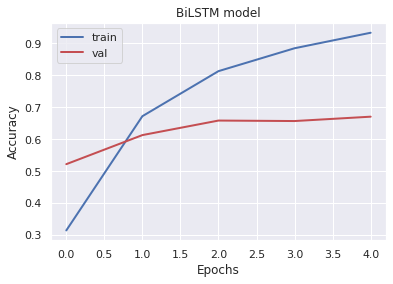

In [ ]:
#GENERATING THE GRAPHS
plt.figure()
plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('BiLSTM model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Defining pre-processing parameters
max_len = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 15000
embedding_dim = 512



tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
total_words = len(word_index)
total_words

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_valid)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)


model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(256,return_sequences = True)))
#model2.add(Dropout(drop_lstm))
model2.add(Bidirectional(LSTM(256,input_shape=(training_padded.shape))))

model2.add(Dropout(0.2))

#model2.add(LSTM(128,activation='relu'))
#model2.add(Dropout(0.2))

model2.add(Dense(64,activation='relu'))

model2.add(Dropout(0.2))

model2.add(Dense(8, activation='softmax'))

num_epochs = 10
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)

model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

history = model2.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_valid),
                     callbacks = [early_stop],
                     verbose = 2)


Epoch 1/10
83/83 - 677s - loss: 1.5921 - accuracy: 0.3998 - val_loss: 1.4332 - val_accuracy: 0.5175 - 677s/epoch - 8s/step
Epoch 2/10
83/83 - 651s - loss: 0.9378 - accuracy: 0.6847 - val_loss: 1.0770 - val_accuracy: 0.6677 - 651s/epoch - 8s/step
Epoch 3/10
83/83 - 663s - loss: 0.5726 - accuracy: 0.8338 - val_loss: 1.0049 - val_accuracy: 0.7026 - 663s/epoch - 8s/step
Epoch 4/10
83/83 - 642s - loss: 0.3258 - accuracy: 0.9074 - val_loss: 1.0470 - val_accuracy: 0.7223 - 642s/epoch - 8s/step
Epoch 5/10
83/83 - 642s - loss: 0.2173 - accuracy: 0.9458 - val_loss: 1.3305 - val_accuracy: 0.7086 - 642s/epoch - 8s/step


In [ ]:
import tensorflow.keras.backend as K
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    recall_ = true_positives / (all_positives + K.epsilon())
    return recall_

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_ = true_positives / (predicted_positives + K.epsilon())
    return precision_

def f1_score(y_true, y_pred):
    precision_f = precision(y_true, y_pred)
    recall_f = recall(y_true, y_pred)
    return 2*((precision_f*recall_f)/(precision_f+recall_f+K.epsilon()))

In [ ]:
f1_score([1,1,1], [0,1,0])

InvalidArgumentError: ignored

In [ ]:
# Defining pre-processing parameters
max_len = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 50000
embedding_dim = 256



tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
total_words = len(word_index)
total_words

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_valid)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)


model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(64,return_sequences = True)))
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(32,input_shape=(training_padded.shape))))

model2.add(Dropout(0.2))

model2.add(Dense(16,activation='relu'))

model2.add(Dropout(0.2))

model2.add(Dense(8, activation='softmax'))

num_epochs = 10
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)

model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

history = model2.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_valid),
                     callbacks = [early_stop],
                     verbose = 2)



X_test, y_test = test["cleaned_resume"], test["position"]
testing_sequences_ = tokenizer.texts_to_sequences(X_test)
testing_padded_ = pad_sequences(testing_sequences_,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

y_predicted = model2.predict(testing_padded_)
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             y_predicted]

inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_test = np.array([inverse_dic[y] for y in y_test])
f1 = metrics.f1_score(y_test, predicted, average='weighted')

print(f1)

Epoch 1/10
83/83 - 10s - loss: 1.9124 - accuracy: 0.2462 - val_loss: 1.5891 - val_accuracy: 0.4279 - 10s/epoch - 124ms/step
Epoch 2/10
83/83 - 4s - loss: 1.3597 - accuracy: 0.5197 - val_loss: 1.2372 - val_accuracy: 0.5903 - 4s/epoch - 43ms/step
Epoch 3/10
83/83 - 4s - loss: 0.9433 - accuracy: 0.6927 - val_loss: 1.1246 - val_accuracy: 0.6525 - 4s/epoch - 43ms/step
Epoch 4/10
83/83 - 4s - loss: 0.6580 - accuracy: 0.8027 - val_loss: 1.0976 - val_accuracy: 0.7011 - 4s/epoch - 43ms/step
Epoch 5/10
83/83 - 4s - loss: 0.5673 - accuracy: 0.8346 - val_loss: 1.1354 - val_accuracy: 0.7041 - 4s/epoch - 44ms/step
Epoch 6/10
83/83 - 4s - loss: 0.3559 - accuracy: 0.9033 - val_loss: 1.1596 - val_accuracy: 0.7132 - 4s/epoch - 43ms/step
26/26 [==============================] - 2s 19ms/step
0.7339403868657535


In [ ]:
auc = metrics.roc_auc_score(y_test, y_predicted, 
                            multi_class="ovr")
print("f1:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

f1: 0.72
Auc: 0.93
Detail:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       100
           1       0.80      0.78      0.79       105
           2       0.65      0.75      0.69       103
           3       0.64      0.63      0.63       105
           4       0.74      0.78      0.76       101
           5       0.92      0.87      0.89       101
           6       0.66      0.58      0.62       106
           7       0.73      0.80      0.76       103

    accuracy                           0.73       824
   macro avg       0.74      0.74      0.73       824
weighted avg       0.74      0.73      0.73       824



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

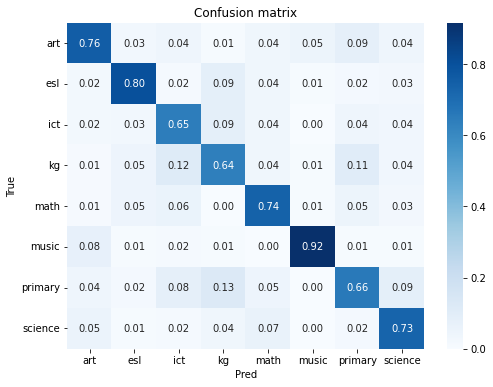

In [ ]:
from sklearn.metrics import confusion_matrix
classes = ['art', 'esl', 'ict', 'kg',
       'math', 'music', 'primary',
       'science']

cm = confusion_matrix(y_test, predicted , normalize='pred')
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=True)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

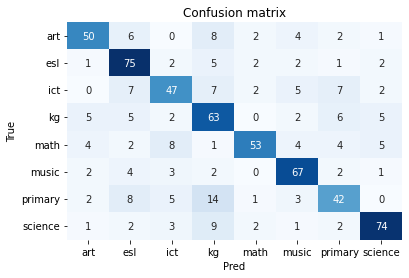

In [ ]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

##**GRU**

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model3.add(SpatialDropout1D(0.2))
model3.add(GRU(128, return_sequences = False))
model3.add(Dropout(0.2))
model3.add(Dense(8, activation = 'softmax'))

In [ ]:
model3.compile(loss = 'sparse_categorical_crossentropy',
                       optimizer = 'adam',
                       metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model3.fit(training_padded,
                     y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, y_valid),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/30
83/83 - 19s - loss: 2.0748 - accuracy: 0.1351 - val_loss: 2.0736 - val_accuracy: 0.1533 - 19s/epoch - 223ms/step
Epoch 2/30
83/83 - 15s - loss: 2.0611 - accuracy: 0.1753 - val_loss: 2.0671 - val_accuracy: 0.1533 - 15s/epoch - 184ms/step
Epoch 3/30
83/83 - 15s - loss: 2.0405 - accuracy: 0.1923 - val_loss: 2.0517 - val_accuracy: 0.1958 - 15s/epoch - 184ms/step
Epoch 4/30
83/83 - 15s - loss: 2.0027 - accuracy: 0.2693 - val_loss: 2.0499 - val_accuracy: 0.2064 - 15s/epoch - 184ms/step
Epoch 5/30
83/83 - 16s - loss: 1.9387 - accuracy: 0.2906 - val_loss: 2.0198 - val_accuracy: 0.2140 - 16s/epoch - 187ms/step
Epoch 6/30
83/83 - 15s - loss: 1.8125 - accuracy: 0.3308 - val_loss: 1.9740 - val_accuracy: 0.2413 - 15s/epoch - 184ms/step
Epoch 7/30
83/83 - 15s - loss: 1.6570 - accuracy: 0.4090 - val_loss: 1.8086 - val_accuracy: 0.3399 - 15s/epoch - 186ms/step
Epoch 8/30
83/83 - 15s - loss: 1.4588 - accuracy: 0.5076 - val_loss: 1.7156 - val_accuracy: 0.3672 - 15s/epoch - 184ms/step
Epoch 9/

In [ ]:
# Comparing the four different models
print(f"Dense model loss and accuracy: {model.evaluate(testing_padded, y_valid)} " )
print(f"LSTM model loss and accuracy: {model1.evaluate(testing_padded, y_valid)} " )
print(f"Bi-LSTM model loss and accuracy: {model2.evaluate(testing_padded, y_valid)} " )
print(f"GRU model loss and accuracy: {model3.evaluate(testing_padded, y_valid)}")

21/21 [==============================] - 0s 2ms/step - loss: 0.9783 - accuracy: 0.7147
Dense model loss and accuracy: [0.978331983089447, 0.714719295501709] 
21/21 [==============================] - 2s 93ms/step - loss: 1.9382 - accuracy: 0.2398
LSTM model loss and accuracy: [1.9381778240203857, 0.2397572100162506] 
21/21 [==============================] - 3s 139ms/step - loss: 1.8684 - accuracy: 0.2822
Bi-LSTM model loss and accuracy: [1.868430256843567, 0.28224581480026245] 
21/21 [==============================] - 1s 43ms/step - loss: 1.7168 - accuracy: 0.3642
GRU model loss and accuracy: [1.7167737483978271, 0.36418816447257996]
